In [ ]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

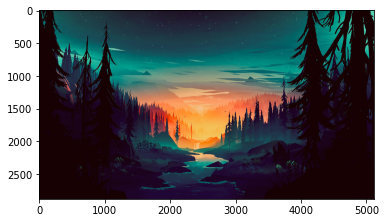

In [ ]:
image = cv.imread('sample.jpg')
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
def rgb_hexa_value(rgb_color): 
    hexa_color = "#"
    for i in rgb_color:
        i = int(i)
        hexa_color += ("{:02x}".format(i))
    return hexa_color

In [ ]:
def preprocessing_image(raw_image):
    new_image = cv.resize(raw_image,(900,600),interpolation = cv.INTER_AREA)
    new_image = new_image.reshape(new_image.shape[0]*new_image.shape[1],3)
    
    return new_image

In [ ]:
def color_analysis(img):
    classifier = KMeans(n_clusters = 10)
    color_labels = classifier.fit_predict(img)
    center_colors = classifier.cluster_centers_
    
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hexa_colors = [rgb_hexa_value(ordered_colors[i]) for i in counts.keys()]
    
    plt.figure(figsize = (16,12))
    plt.pie(counts.values(),colors = hexa_colors)
    plt.savefig("Analyzed_pie_chart.png")
    
    # print(hexa_colors)

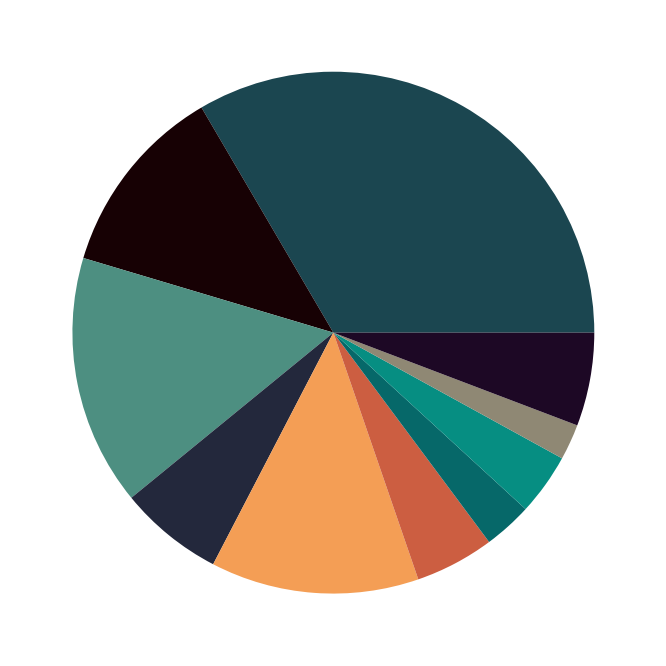

In [ ]:
modified_image = preprocessing_image(image)
color_analysis(modified_image)